# Imports

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from nn_with_py.NNModels.Model import Model
from nn_with_py.Layers.LayerDense import Layer_Dense
from nn_with_py.Layers.LayerDropout import Layer_Dropout
from nn_with_py.ActivationFunctions.ActivationRelu import Activation_Relu
from nn_with_py.ActivationFunctions.ActivationSoftmax import Activation_Softmax
from nn_with_py.LossFunctions.LossCategoricalCrossentropy import Loss_CategoricalCrossentropy
from nn_with_py.Optimizers.OptimizerAdam import Optimizer_Adam
from nn_with_py.Accuracy.AccuracyCategorical import Accuracy_Categorical

# Data Loading

In [92]:
PATH = "/Users/mikolajstarczewski/Desktop/Magisterka/NN_with_py/nn_with_py/data_files/"

X_train = np.load(PATH + "X_train.npy")
X_test = np.load(PATH + "X_test.npy")
Y_train = np.load(PATH + "Y_train.npy")
Y_test = np.load(PATH + "Y_test.npy")

In [93]:
# Flattening Data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print(X_train.shape)
print(X_train[0].shape)
print(32*32)
print(X_test.shape)
print(X_test[0].shape)

(446524, 1024)
(1024,)
1024
(55815, 1024)
(1024,)


# Creating Neural Network Model

In [94]:
nn_model_w_py = Model()

nn_model_w_py.add(Layer_Dense(X_train.shape[1], 1024, 
                              weight_regularizer_l2=5e-6, bias_regularizer_l2=5e-6))
nn_model_w_py.add(Activation_Relu())
nn_model_w_py.add(Layer_Dense(1024, 512))
nn_model_w_py.add(Activation_Relu())
nn_model_w_py.add(Layer_Dense(512, 256))
nn_model_w_py.add(Activation_Relu())
nn_model_w_py.add(Layer_Dropout(0.2))
nn_model_w_py.add(Layer_Dense(256, 128))
nn_model_w_py.add(Activation_Relu())
nn_model_w_py.add(Layer_Dropout(0.2))
nn_model_w_py.add(Layer_Dense(128, 89))
nn_model_w_py.add(Activation_Softmax())

nn_model_w_py.set(
    loss=Loss_CategoricalCrossentropy(),
    optimizer=Optimizer_Adam(decay=1e-6),
    accuracy=Accuracy_Categorical()
)

nn_model_w_py.finalize()

# Training

In [95]:
nn_model_w_py.train(X_train, Y_train, 
                    validation_data=(X_test, Y_test), 
                    epochs=30,  
                    batch_size=128,
                    print_every=1000)

epoch: 1
step: 0, acc: 0.008, loss: 4.489 (data_loss: 4.489, reg_loss: 0.001), lr: 0.001
step: 1000, acc: 0.203, loss: 2.660 (data_loss: 2.659, reg_loss: 0.001), lr: 0.0009990009990009992
step: 2000, acc: 0.453, loss: 1.954 (data_loss: 1.953, reg_loss: 0.002), lr: 0.000998003992015968
step: 3000, acc: 0.492, loss: 1.417 (data_loss: 1.415, reg_loss: 0.002), lr: 0.0009970089730807579
step: 3488, acc: 0.533, loss: 1.341 (data_loss: 1.338, reg_loss: 0.003), lr: 0.0009965241238559903
training, acc: 0.365, loss: 2.235 (data_loss: 2.232, reg_loss: 0.003), lr: 0.0009965241238559903
validation, acc: 0.606, loss: 1.229
epoch: 2
step: 0, acc: 0.617, loss: 1.198 (data_loss: 1.195, reg_loss: 0.003), lr: 0.0009965231307966504
step: 1000, acc: 0.555, loss: 1.304 (data_loss: 1.301, reg_loss: 0.003), lr: 0.0009955310610668708
step: 2000, acc: 0.633, loss: 1.158 (data_loss: 1.154, reg_loss: 0.004), lr: 0.0009945409646450632
step: 3000, acc: 0.664, loss: 0.990 (data_loss: 0.986, reg_loss: 0.004), lr: 0.0

- <h3> Saving params (model needs to be initialized with same exact composition)
- <h3> Saving whole model

In [97]:
MODEL_PROPS_PATH = "/Users/mikolajstarczewski/Desktop/Magisterka/NN_with_py/nn_with_py/NNModels/properties/"

nn_model_w_py.save_parameters(MODEL_PROPS_PATH + 'nn_model_w_py_params.parms')
nn_model_w_py.save(MODEL_PROPS_PATH + 'nn_model_w_py_model.model')

# Validation

In [77]:
X_val = np.load(PATH + "X_val.npy")
X_val = X_val.reshape(X_val.shape[0], -1)
Y_val = np.load(PATH + "Y_val.npy")

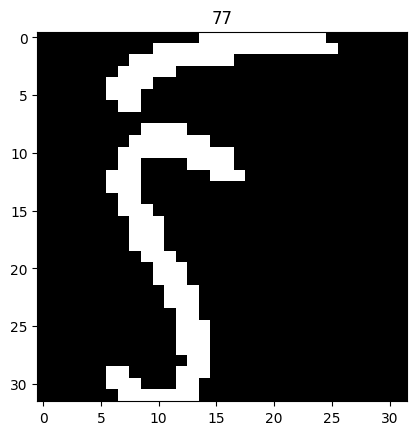

In [78]:
for index in range(1, 2):
    plt.title((Y_val[index]))
    plt.imshow(X_val[index].reshape(32,32), cmap=cm.binary)
    plt.show()

In [ ]:
confidences = nn_model_w_py.predict(X_val[1])

# Tests

In [32]:
nn_model_w_py_v2 = Model()

nn_model_w_py_v2.add(Layer_Dense(X_train.shape[1], 256))
nn_model_w_py_v2.add(Activation_Relu())
nn_model_w_py_v2.add(Layer_Dense(256, 128))
nn_model_w_py_v2.add(Activation_Relu())
nn_model_w_py_v2.add(Layer_Dense(128, 128))
nn_model_w_py_v2.add(Activation_Relu())
nn_model_w_py_v2.add(Layer_Dropout(0.2))
nn_model_w_py_v2.add(Layer_Dense(128, 89))
nn_model_w_py_v2.add(Activation_Softmax())

nn_model_w_py_v2.set(
    loss=Loss_CategoricalCrossentropy(),
    accuracy=Accuracy_Categorical()
)

nn_model_w_py_v2.finalize()
nn_model_w_py_v2.load_parameters(MODEL_PROPS_PATH + 'nn_model_w_py_params.parms')
nn_model_w_py_v2.evaluate(X_val, Y_val)

validation, acc: 0.722, loss: 0.851


In [98]:
loaded_model = Model.load(MODEL_PROPS_PATH + 'nn_model_w_py_model.model')
loaded_model.evaluate(X_test, Y_test)

validation, acc: 0.777, loss: 0.656


In [103]:
good_vals = 0
all_vals = 100
for i in range(0, all_vals):
    confidences = loaded_model.predict(X_val[i])
    print(f"True value: {Y_val[i]}")
    print(f"Predicted: {np.argmax(confidences)}")
    print("---------------")
    if np.argmax(confidences) == Y_val[i]:
        good_vals += 1
print(f"Mean {(good_vals/all_vals):.3}")

True value: 24
Predicted: 24
---------------
True value: 77
Predicted: 5
---------------
True value: 1
Predicted: 1
---------------
True value: 83
Predicted: 83
---------------
True value: 76
Predicted: 76
---------------
True value: 6
Predicted: 6
---------------
True value: 61
Predicted: 61
---------------
True value: 27
Predicted: 36
---------------
True value: 78
Predicted: 74
---------------
True value: 86
Predicted: 86
---------------
True value: 86
Predicted: 86
---------------
True value: 39
Predicted: 39
---------------
True value: 44
Predicted: 44
---------------
True value: 77
Predicted: 69
---------------
True value: 5
Predicted: 5
---------------
True value: 71
Predicted: 71
---------------
True value: 54
Predicted: 54
---------------
True value: 81
Predicted: 81
---------------
True value: 44
Predicted: 44
---------------
True value: 88
Predicted: 81
---------------
True value: 87
Predicted: 87
---------------
True value: 63
Predicted: 72
---------------
True value: 47
Pr